In [106]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib

In [2]:
codecs = ['ascii','big5','big5hkscs','cp037','cp273','cp424','cp437','cp500','cp720','cp737','cp775','cp850','cp852','cp855',
          'cp856','cp857','cp858','cp860','cp861','cp862','cp863','cp864','cp865','cp866','cp869','cp874','cp875','cp932','cp949',
          'cp950','cp1006','cp1026','cp1125','cp1140','cp1250','cp1251','cp1252','cp1253','cp1254','cp1255','cp1256','cp1257','cp1258',
          'euc_jp','euc_jis_2004','euc_jisx0213','euc_kr','gb2312','gbk','gb18030','hz','iso2022_jp','iso2022_jp_1','iso2022_jp_2',
          'iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr','latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6',
          'iso8859_7','iso8859_8','iso8859_9','iso8859_10','iso8859_11','iso8859_13','iso8859_14','iso8859_15','iso8859_16','johab','koi8_r','koi8_t',
          'koi8_u','kz1048','mac_cyrillic','mac_greek','mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154','shift_jis','shift_jis_2004',
          'shift_jisx0213','utf_32','utf_32_be','utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8','utf_8_sig']

In [3]:
for enc in codecs  :
     try : 
          pd.read_csv("../DATA/Online/Online_Retail.csv",sep=",",encoding=enc)
          print (enc)
     except :
          pass

cp437
cp720
cp737
cp775
cp850
cp852
cp855
cp857
cp858
cp860
cp861
cp862
cp863
cp864
cp865
cp866
cp869
cp874
cp932
cp1006
cp1125
cp1250
cp1251
cp1252
cp1253
cp1254
cp1255
cp1256
cp1257
cp1258
latin_1
iso8859_2
iso8859_3
iso8859_4
iso8859_5
iso8859_7
iso8859_8
iso8859_9
iso8859_10
iso8859_11
iso8859_13
iso8859_14
iso8859_15
iso8859_16
koi8_r
koi8_t
koi8_u
kz1048
mac_cyrillic
mac_greek
mac_iceland
mac_latin2
mac_roman
mac_turkish
ptcp154
shift_jis
shift_jis_2004
shift_jisx0213
utf_16_be
utf_16_le


In [4]:
data =pd.read_csv("../DATA/Online/Online_Retail.csv",sep=",",encoding="iso8859_2")


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.isna().sum()/data.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [8]:
data  = data.dropna().reset_index(drop=True)

In [9]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [10]:
from wordcloud import WordCloud ## capitalized 

In [11]:
text = " ".join(data.Description)

In [12]:
stop_words = ['red','pink','blue','of','white','small','t','and','in','set']

In [13]:
wc = WordCloud(collocations=False,
               stopwords=stop_words,
               background_color="white").generate(text.lower()) ## capitalized 

(-0.5, 399.5, 199.5, -0.5)

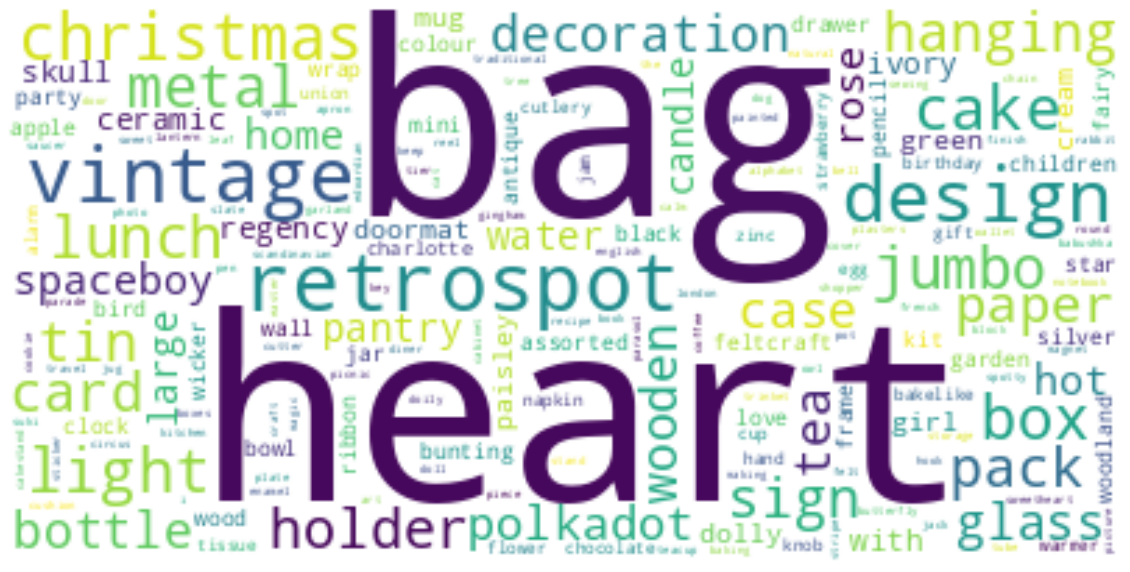

In [14]:
plt.figure(figsize=(20,20))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")

In [15]:
data['TotalPrice'] = data['Quantity'] * data["UnitPrice"]

In [16]:
data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
TotalPrice      4041
dtype: int64

In [17]:
data["InvoiceDate"] =pd.to_datetime(data["InvoiceDate"])

In [66]:
customer_data = pd.DataFrame(
     {
          '#invoice' : data.groupby('CustomerID')['InvoiceNo'].nunique(),
          'Country' : data.groupby('CustomerID')['Country'].unique().str[0],
          'Mean_purch' :data.groupby('CustomerID')['TotalPrice'].mean(), 
          'Sum_purch':data.groupby('CustomerID')['TotalPrice'].sum(),
          '#item' : data.groupby('CustomerID')['StockCode'].nunique(),
          '#quantity' : data.groupby('CustomerID')['Quantity'].sum(),
          'Mean_quantity' : data.groupby('CustomerID')['Quantity'].mean(),
          'Life_time' : ( data.groupby('CustomerID')['InvoiceDate'].max() - data.groupby('CustomerID')['InvoiceDate'].min() ).dt.days

     }
)

In [67]:
customer_data

,#invoice,Country,Mean_purch,Sum_purch,#item,#quantity,Mean_quantity,Life_time
CustomerID,,,,,,,,
12346.0,2,United Kingdom,0.000000,0.00,1,0,0.000000,0
12347.0,7,Iceland,23.681319,4310.00,103,2458,13.505495,475
12348.0,4,Finland,57.975484,1797.24,22,2341,75.516129,282
12349.0,1,Italy,24.076027,1757.55,73,631,8.643836,0
12350.0,1,Norway,19.670588,334.40,17,197,11.588235,0
...,...,...,...,...,...,...,...,...
18280.0,1,United Kingdom,18.060000,180.60,10,45,4.500000,0
18281.0,1,United Kingdom,11.545714,80.82,7,54,7.714286,0
18282.0,3,United Kingdom,13.584615,176.60,12,98,7.538462,208


In [68]:
customer_data['Country'].value_counts()

United Kingdom          3950
Germany                   95
France                    87
Spain                     29
Belgium                   24
Switzerland               20
Portugal                  19
Italy                     15
Finland                   12
Norway                    10
Netherlands                9
Austria                    9
Channel Islands            9
Australia                  9
Sweden                     8
Japan                      8
Denmark                    8
Cyprus                     7
Poland                     6
USA                        4
Canada                     4
Greece                     4
Israel                     4
Unspecified                4
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Saudi Arabia               1
Singapore                  1
Iceland                    1
RSA                        1
Lebanon                    1
Brazil                     1
Czech Republic

<AxesSubplot: xlabel='#invoice', ylabel='Count'>

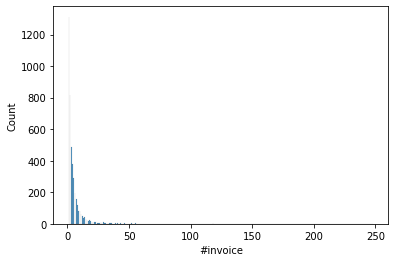

In [69]:
sns.histplot(x='#invoice',data=customer_data)

<AxesSubplot: xlabel='Mean_purch', ylabel='Density'>

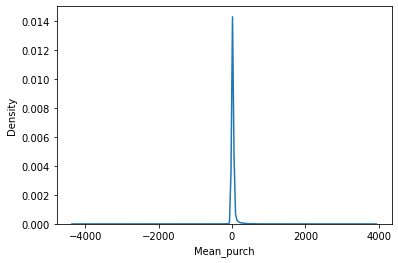

In [70]:
sns.kdeplot(x='Mean_purch',data = customer_data)

In [71]:
customer_data= customer_data[customer_data['Mean_purch']>0].reset_index(drop=True)

<AxesSubplot: xlabel='Mean_purch', ylabel='Density'>

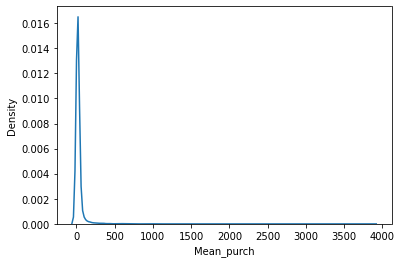

In [72]:
sns.kdeplot(x='Mean_purch',data = customer_data)

In [73]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram 


In [101]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    import matplotlib 
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [102]:
customer_data

,#invoice,Mean_purch,Sum_purch,#item,#quantity,Mean_quantity,Life_time
0,7,23.681319,4310.00,103,2458,13.505495,475
1,4,57.975484,1797.24,22,2341,75.516129,282
2,1,24.076027,1757.55,73,631,8.643836,0
3,1,19.670588,334.40,17,197,11.588235,0
4,11,16.267474,1545.41,59,470,4.947368,268
...,...,...,...,...,...,...,...
4317,1,18.060000,180.60,10,45,4.500000,0
4318,1,11.545714,80.82,7,54,7.714286,0
4319,3,13.584615,176.60,12,98,7.538462,208
4320,16,2.771005,2094.88,263,1397,1.847884,310


In [103]:
#customer_data = customer_data.drop(columns=['Country'])

In [104]:
model = AgglomerativeClustering(distance_threshold=0,
                                n_clusters= None,
                                linkage='ward' )
model.fit(customer_data)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [109]:
import matplotlib

In [115]:
plot_dendrogram(model ,truncate_mode = 'level',p=4)

ImportError: You must install the matplotlib library to plot the dendrogram. Use no_plot=True to calculate the dendrogram without plotting.

KeyError: 'cluster'